# Lab 8 - Deep Learning 3

The goal of this week's lab is to learn to use another widely-used neural network module: recurrent neural networks (RNNs). We can use it to learn features from sequences such as time series and text.

![image](https://www.researchgate.net/profile/Huy-Tien-Nguyen/publication/321259272/figure/fig2/AS:572716866433034@1513557749934/Illustration-of-our-LSTM-model-for-sentiment-classification-Each-word-is-transfered-to-a_W640.jpg)

How should we extract features from sequences, which might be of variable length? Recurrent Neural Networks (RNNs) provide a solution by summarizing the entire sequence into a fixed-size vector representation. This week we will walk through how to use RNNs for sequence processing.

* **Review**: Convolutional Neural Networks (CNNs)
* **Unit A**: Time Series Classification and Recurrent Neural Networks (RNNs)
* **Unit B**: Recurrent Neural Networks for Text Classification

## Review

Last time we learned the basics of convolutional neural networks (CNNs) and used them for image classification.

In [ ]:
# For Tables
import pandas as pd
# For Visualization
import altair as alt
# For Scikit-Learn
import sklearn
from keras.wrappers.scikit_learn import KerasClassifier
# For Neural Networks
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Reshape

We will also turn off warnings.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

We saw in last week how to store images and their labels in Pandas dataframes.

In [ ]:
df_train = pd.read_csv('https://srush.github.io/BT-AI/notebooks/mnist_train.csv.gz', compression='gzip')
df_test = pd.read_csv('https://srush.github.io/BT-AI/notebooks/mnist_test.csv.gz', compression='gzip')

The column `class` stores the class of each image, which is a number between 0 and 9.

In [ ]:
df_train[:100]["class"].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

The rest of columns store the features, where we have 784 features since our images are 28x28. Each feature stores the intensity at each pixel : for instance, the column "3x4" stores the pixel value at the 3rd row and the 4th column. Since the size of each image is 28x28, there are 28 rows and 28 columns.

To make later processing easier, we store the names of pixel value columns in a list `features`.

In [ ]:
features = []
for i in range(1, 29):
    for j in range(1, 29):
        features.append(str(i) + "x" + str(j))
len(features)

784

We used the below utility functions for visualizing the images.

Convert feature to x, y, and value.

In [ ]:
def position(row):
    y, x = row["index"].split("x")
    return {"x":int(x),
            "y":int(y),
            "val":row["val"]}
def draw_image(i, shuffle=False):
    t = df_train[i:i+1].T.reset_index().rename(columns={i: "val"})
    out = t.loc[t["index"] != "class"].apply(position, axis=1, result_type="expand")

    label = df_train.loc[i]["class"]
    title = "Image of a " + str(label)
    if shuffle:
        out["val"] = sklearn.utils.shuffle(out["val"], random_state=1234).reset_index()["val"]
        title = "Shuffled Image of a " + str(label)
        
    return (alt.Chart(out)
            .mark_rect()
            .properties(title=title)
            .encode(
                x="x:O",
                y="y:O",
                fill="val:Q",
                color="val:Q",
                tooltip=("x", "y", "val")
            ))

We can visualize an example image.

In [ ]:
im = draw_image(0)
im

alt.Chart(...)

The task is to classify the label given an image. To do that, we first need to define a function that creates our model.

Here is what a CNN model looks like. It contains two convolution layers and two max pooling layers.

In [ ]:
def create_cnn_model():
    # create model
    input_shape = (28, 28, 1)
    model = Sequential()
    model.add(Reshape(input_shape))
    model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax")) # output a vector of size 10
    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])
    return model

Then we create the model and fit it on training data.

In [ ]:
model = KerasClassifier(build_fn=create_cnn_model,
                         epochs=2,
                         batch_size=20,
                         verbose=1)
# fit model
model.fit(x=df_train[features].astype(float),
          y=df_train["class"])

Epoch 1/2
3000/3000 [==============================] - 61s 20ms/step - loss: 1.1024 - accuracy: 0.8967
Epoch 2/2
3000/3000 [==============================] - 58s 19ms/step - loss: 0.0767 - accuracy: 0.9782


With a trained model, we can apply it to the test dataset and measure the test accuracy.

In [ ]:
df_test["predict"] = model.predict(df_test[features])
correct = (df_test["predict"] == df_test["class"])
accuracy = correct.sum() / correct.size
print ("accuracy: ", accuracy)

500/500 [==============================] - 3s 6ms/step
accuracy:  0.98


### Review Exercise

Change the model above to have the kernel size of convolution layers to be (1, 1). How does this affect the performance? Why?

In [ ]:
#📝📝📝📝 FILLME
pass
#SOLUTION
def create_cnn_model():
    # create model
    input_shape = (28, 28, 1)
    model = Sequential()
    model.add(Reshape(input_shape))
    model.add(Conv2D(32, kernel_size=(1, 1), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(1, 1), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax")) # output a vector of size 10
    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])
    return model
model = KerasClassifier(build_fn=create_cnn_model,
                         epochs=2,
                         batch_size=20,
                         verbose=1)
# fit model
model.fit(x=df_train[features].astype(float),
          y=df_train["class"])
df_test["predict"] = model.predict(df_test[features])
correct = (df_test["predict"] == df_test["class"])
accuracy = correct.sum() / correct.size
print ("accuracy: ", accuracy)

Epoch 1/2
3000/3000 [==============================] - 40s 13ms/step - loss: 1.3524 - accuracy: 0.7538
Epoch 2/2
500/500 [==============================] - 2s 4ms/step
accuracy:  0.8671


Change the model above to have the kernel size of the first convolution layer to be (28, 28), and remove other convolution and pooling layers. How does this affect the performance? Why?

In [ ]:
#📝📝📝📝 FILLME
pass
#📝📝📝📝 FILLME
pass
#SOLUTION
def create_cnn_model():
    # create model
    input_shape = (28, 28, 1)
    model = Sequential()
    model.add(Reshape(input_shape))
    model.add(Conv2D(32, kernel_size=(28, 28), activation="relu"))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax")) # output a vector of size 10
    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])
    return model
model = KerasClassifier(build_fn=create_cnn_model,
                         epochs=2,
                         batch_size=20,
                         verbose=1)
# fit model
model.fit(x=df_train[features].astype(float),
          y=df_train["class"])
df_test["predict"] = model.predict(df_test[features])
correct = (df_test["predict"] == df_test["class"])
accuracy = correct.sum() / correct.size
print ("accuracy: ", accuracy)

Epoch 1/2
3000/3000 [==============================] - 6s 2ms/step - loss: 1.2770 - accuracy: 0.6850
Epoch 2/2
500/500 [==============================] - 1s 1ms/step
accuracy:  0.9156


## Unit A

### Time Series Classification and Recurrent Neural Networks (RNNs)

Just like CNNs are suitable for the processing of 2-D images (and 1-D sequences since they can be viewed as a special case of 2-D images), recurrent neural networks (RNNs) are suitable for 1-D sequence modeling.

Let's start from a concrete sequence classification example, where we want to classify a curve into one of three possible classes: rectangle, triangle, and ellipse:

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/srush/BT-AI/main/notebooks/shape_classification_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/srush/BT-AI/main/notebooks/shape_classification_train.csv')
df_train

,class,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,square,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0
1,square,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0,0,0,0,0,0
2,triangle,0,0,0,0,0,0.0,0.0,0.08,0.16,0.24,0.32,0.400000,0.480000,0.560000,0.640000,0.720000,0.800000,0.880000,1.040000,0.960000,0.880000,0.800000,0.720000,0.640000,0.560000,0.480000,0.400000,0.320000,0.240000,0.160000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0
3,triangle,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.250000,0.375000,0.500000,0.625000,0.750000,0.875000,1.000000,0.875000,0.750000,0.625000,0.500000,0.375000,0.250000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0
4,square,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,ellipse,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,0.359011,0.498888,0.600000,0.679869,0.745356,0.800000,0.845905,0.884433,0.916515,0.942809,0.963789,0.979796,0.991071,0.997775,1.000000,0.997775,0.991071,0.979796,0.963789,0.942809,0.916515,0.884433,0.845905,0.800000,0.745356,0.679869,0.600000,0.498888,0.359011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0
1196,ellipse,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,0.320145,0.446594,0.539313,0.613784,0.676065,0.729285,0.775312,0.815365,0.850289,0.880695,0.907036,0.929659,0.948829,0.964753,0.977588,0.987456,0.994444,0.998614,1.000000,0.998614,0.994444,0.987456,0.977588,0.964753,0.948829,0.929659,0.907036,0.880695,0.850289,0.815365,0.775312,0.729285,0.676065,0.613784,0.539313,0.446594,0.320145,0.0,0,0,0,0,0,0
1197,square,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0
1198,ellipse,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,0.000000,0.515079,0.699854,0.820652,0.903508,0.958315,0.989743,1.000000,0.989743,0.958315,0.903508,0.820652,0.699854,0.515079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0


In this example, the curve is stored as a vector with 55 entries. In the dataframe, the i-th entry of this vector is stored in a column named $i$.
As before, we store the names of feature columns in a list `features`.

In [ ]:
input_length = 55
features = []
for i in range(input_length):
    features.append(str(i))

We can visualize some examples using the following function.

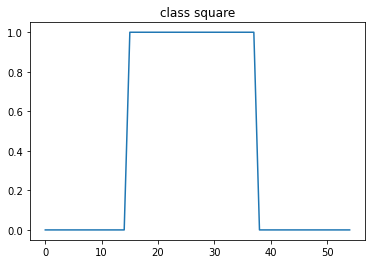

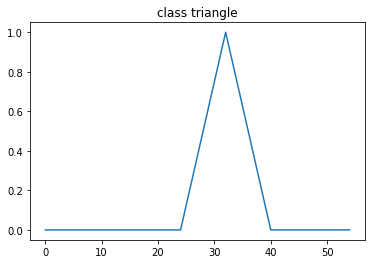

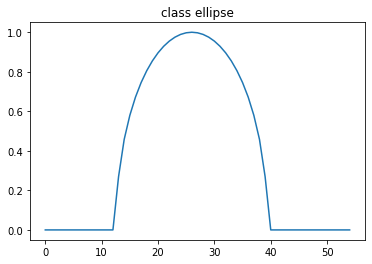

In [ ]:
import matplotlib.pyplot as plt
def draw_curve(i):
    t = df_train[features].iloc[i]
    c = df_train['class'].iloc[i]
    plt.plot(list(t))
    plt.title(f'class {c}')
    plt.show()
draw_curve(0)
draw_curve(3)
draw_curve(5)

First, let's try to apply an MLP classifier to this problem. Note that we need to set the size of the last layer to be 3 since there are three output classes.

In [ ]:
def create_mlp_model():
    # create model
    model = Sequential()
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax')) # output a vector of size 3
    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])
    return model

In [ ]:
# create model
model = KerasClassifier(build_fn=create_mlp_model,
                        epochs=10,
                        batch_size=20,
                        verbose=1)
# fit model
model.fit(x=df_train[features], y=df_train["class"])
# print summary
print (model.model.summary())
# predict on test set
df_test["predict"] = model.predict(df_test[features])
correct = (df_test["predict"] == df_test["class"])
accuracy = correct.sum() / correct.size
print ("accuracy: ", accuracy)

Epoch 1/10
60/60 [==============================] - 1s 2ms/step - loss: 1.0707 - accuracy: 0.3499
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: 0.9794 - accuracy: 0.4853
Epoch 3/10
60/60 [==============================] - 0s 1ms/step - loss: 0.9556 - accuracy: 0.4800
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 0.9145 - accuracy: 0.5051
Epoch 5/10
60/60 [==============================] - 0s 2ms/step - loss: 0.9016 - accuracy: 0.5360
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 0.8772 - accuracy: 0.5470
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 0.8426 - accuracy: 0.5903
Epoch 8/10
60/60 [==============================] - 0s 2ms/step - loss: 0.8201 - accuracy: 0.6059
Epoch 9/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7947 - accuracy: 0.6644
Epoch 10/10
60/60 [==============================] - 0s 1ms/step - loss: 0.7720 - accuracy: 0.6689
Model: "sequential_

The accuracy of the MLP classifier is quite low considering the simplicity of this task. The major challenge of this task is that even for the same shapes, the positions where they appear in the sequence, and their sizes may vary. For example, let's look at some rectangles.

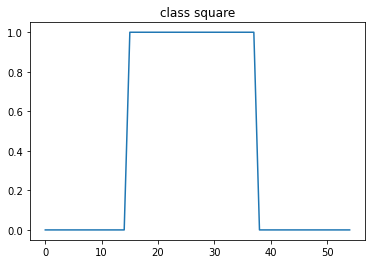

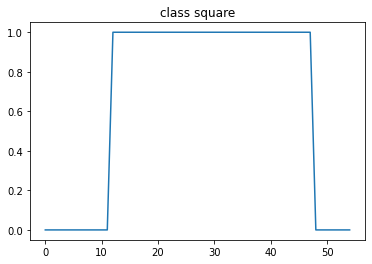

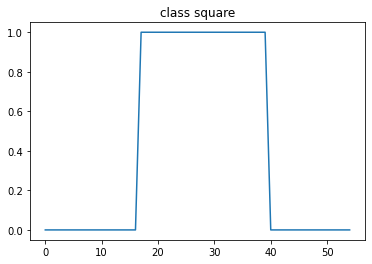

In [ ]:
draw_curve(0)
draw_curve(1)
draw_curve(4)

👩🎓**Student question: Do you think MLPs are suitable for this task? Why or why not?**

In [ ]:
#📝📝📝📝 FILLME
pass

### Recurrent Neural Networks (RNNs)

Recurrent Neural Networks (RNNs) work by iteratively applying the same base operation to each element in the input sequence. To keep track of what it has seen so far, it also maintains an internal state. We call the base operation an RNN cell. Throughout this lab, we will use a special kind of RNN cell, a Long short-term memory (LSTM) cell due to its empirical successes.

Let's assume that we have a sequence of inputs $x_1, \ldots, x_T$. (We're notating the input elements as if they are scalars, but you should keep in mind that they might well be vectors themselves.) Let's consider a single update operation at step $t$, where the current internal state is denoted by $h_t$:

$h_{t+1} = {\text{LSTM}}_{\phi} (h_t, x_t)$,

where the LSTM cell has two inputs and one output: it uses both the input element $x_t$ and the old memory $h_t$ to compute the updated memory $h_{t+1}$. $\phi$ denotes the parameters of the LSTM cell, which we can adjust during training. For simplicy, we omit these parameters througout the rest of this lab. The internal computations of the LSTM cell are beyond the scope of this course, but for anyone interested in knowing further details, [this blog post](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) might be a good starting point.

Now that we have defined a single update step, we can chain them together to produce a summary of $x_1, \ldots, x_T$, starting from $h_0=0$:

\begin{align}
h_0 &= 0 \\
h_1 &= \text{LSTM} (h_0, x_1) \\ 
h_2 &= \text{LSTM} (h_1, x_2) \\ 
h_3 &= \text{LSTM} (h_2, x_3) \\ 
\vdots\\
h_T &= \text{LSTM} (h_{T-1}, x_T) \\ 
\end{align}"

$h_T$ can be used as a feature representation for the entire input sequence $x_1, \ldots, x_T$.

In `Keras`, the API for an LSTM cell is
```
LSTM(
    units,
    activation="tanh",
    recurrent_activation="sigmoid",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    time_major=False,
    unroll=False,
    **kwargs
)
```
It appears intimidating, but we only need to set `units` in this lab. In a nutshell, it controls the size of the hidden states in the LSTM cell: the larger the size, the more powerful the model will be, but the more likely the model will overfit to training data (overfitting means memorizing the training data without being able to generlize to the test data).

In [ ]:
from keras.layers import LSTM
hidden_size = 32
lstm_layer = LSTM(hidden_size)

This layer can be applied to a sequence of inputs $x_1, \ldots, x_T$, and the output will be the final hidden state $h_T$. Below shows an example of how to use this layer. Note that we need to use a `Reshape` layer to add one additional dimension to the input sequence since the expected input shape of the LSTM layer is `sequence_length x input size`, and the `input_size` in the case is 1 since $x_t$'s are scalars is 1.

In [ ]:
input_shape = (input_length, 1)
model = Sequential()
model.add(Reshape(input_shape))
model.add(lstm_layer)
#
# take the first example as input
# input shape: num samples x input_length
# output shape: num samples x hidden size
inputs = tf.convert_to_tensor(df_train[features].iloc[:1])
output = model(inputs)
print (inputs.shape)
print (output.shape)

(1, 55)
(1, 32)


# Group Exercise A

## Question 0

Icebreakers

Who are other members of your group today?

Karina, Nadiia and Esther

📝📝📝📝 FILLME

* What's their favorite place?

Own room and the park

📝📝📝📝 FILLME

* What are their goals by the end of the decade?

To find an internship/job and start own company

📝📝📝📝 FILLME

## Question 1

Look at this figure again. Can you figure out where are $h_t$'s and $x_t$'s? (Don't worry if you not understand the entire diagram does for now, we will elaborate on it later)**

![image](https://www.researchgate.net/profile/Huy-Tien-Nguyen/publication/321259272/figure/fig2/AS:572716866433034@1513557749934/Illustration-of-our-LSTM-model-for-sentiment-classification-Each-word-is-transfered-to-a_W640.jpg)

In [ ]:
#📝📝📝📝 FILLME
# The ht's xt's are in the long-short term memory networks and sequence of neural networks.

Why can LSTMs process variable length inputs?

In [ ]:
#📝📝📝📝 FILLME
#The LSTMs process variable length inputs step by step.

## Question 2

Modify the MLP code to use LSTM instead. We recommend using a hidden size of 32 or 64. Train the model and report the test accuracy. You should expect to see at least 90% accuracy. Hint: don't forget the reshape layer before the LSTM!

In [ ]:
#📝📝📝📝 FILLME
pass
def create_rnn_model():
    tf.random.set_seed(1234)
    # create model
    input_shape = (input_length, 1)
    model = Sequential()
    model.add(Reshape(input_shape))
    model.add(LSTM(32))
    model.add(Dense(3, activation='softmax')) # output a vector of size 3
    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])
    return model
#
# create model
model = KerasClassifier(build_fn=create_rnn_model,
                         epochs=10,
                         batch_size=20,
                         verbose=1)
# fit model
model.fit(x=df_train[features], y=df_train["class"])
# print summary
print (model.model.summary())
# predict on test set
df_test["predict"] = model.predict(df_test[features])
correct = (df_test["predict"] == df_test["class"])
accuracy = correct.sum() / correct.size
print ("accuracy: ", accuracy)

Epoch 1/10
60/60 [==============================] - 3s 14ms/step - loss: 1.0924 - accuracy: 0.3909
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.8978 - accuracy: 0.5822
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7772 - accuracy: 0.6318
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6576 - accuracy: 0.7066
Epoch 5/10
60/60 [==============================] - 1s 15ms/step - loss: 0.4706 - accuracy: 0.8408
Epoch 6/10
60/60 [==============================] - 1s 16ms/step - loss: 1.0184 - accuracy: 0.5086
Epoch 7/10
60/60 [==============================] - 1s 15ms/step - loss: 0.5751 - accuracy: 0.7174
Epoch 8/10
60/60 [==============================] - 1s 15ms/step - loss: 0.4743 - accuracy: 0.8543
Epoch 9/10
60/60 [==============================] - 1s 15ms/step - loss: 0.3043 - accuracy: 0.9343
Epoch 10/10
60/60 [==============================] - 1s 15ms/step - loss: 0.1980 - accuracy: 0.9595
Model: "s

## Unit B

### Recurrent Neural Networks for Text Classification

Now let's go to a real application: text classification. Text classification raises new challenges, as the inputs are strings instead of the numeric values we have been familiar with in this course. In this unit, we will first find a suitable feature representation for the text input, and then we will apply an LSTM-based model to this task.

The text classification task we will be working with is sentiment analysis,  where the goal is to classify the sentiment of a text sequence. In particular, we will use the Stanford Sentiment Treebank v2 (SST-2) dataset, where we want to predict the sentiment (positive or negative) for a movie review.

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/srush/BT-AI/main/notebooks/sst_movie_reviews_processed_train.csv.gz', compression='gzip')
df_test = pd.read_csv('https://raw.githubusercontent.com/srush/BT-AI/main/notebooks/sst_movie_reviews_processed_test.csv.gz', compression='gzip')
df_train[:10]

,class,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,positive,an,ambitious,',what,if,?,',PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
1,positive,a,great,cast,and,a,wonderful,but,sometimes,confusing,OOV,movie,about,growing,up,in,a,dysfunctional,family,.,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
2,positive,remarkable,for,its,intelligence,and,intensity,.,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
3,positive,steven,soderbergh,',s,digital,video,experiment,is,a,clever,and,cutting,",",quick,and,dirty,look,at,modern,living,and,movie,life,.,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
4,positive,a,whole,lot,of,fun,and,funny,in,the,middle,",",though,somewhat,less,OOV,at,the,start,and,finish,.,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
5,positive,constantly,touching,",",surprisingly,funny,",",OOV,exploration,of,the,creative,act,.,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
6,negative,it,',s,as,if,allen,",",at,OOV,",",has,OOV,challenging,himself,.,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
7,negative,check,your,brain,and,your,secret,agent,OOV,ring,at,the,door,because,you,don,',t,want,to,think,too,much,about,what,',s,going,on,.,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
8,negative,it,',s,just,hard,to,believe,that,a,life,like,this,can,sound,so,dull,.,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
9,negative,the,rollerball,sequences,feel,OOV,and,OOV,.,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD


The column `class` stores the sentiment of each review, which is either "positive" or "negative".

In [ ]:
df_train[:100]["class"].unique()

array(['positive', 'negative'], dtype=object)

The other columns store the words, where the i-th word is stored in a feature column i (counting from 0). For example, the first word of each movie review is stored in column 0, the second word is stored in column 1, and so on. As before, we store all feature column names in a list. The maximum length of sentences is 55 on this dataset, so we have 55 feature columns.

In [ ]:
input_length = 55
features = []
for i in range(input_length):
    features.append(str(i))

Notice that some tokens towards the end are `PAD`. They are actually placeholders to pad every sentence into the same length such that we can store them in a table.

In [ ]:
data = df_train[features].values
labels = df_train['class'].values
print (labels[1], data[1])
print (labels[8], data[8])

positive ['a' 'great' 'cast' 'and' 'a' 'wonderful' 'but' 'sometimes' 'confusing'
 'OOV' 'movie' 'about' 'growing' 'up' 'in' 'a' 'dysfunctional' 'family'
 '.' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD'
 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD'
 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD'
 'PAD']
negative ['it' "'" 's' 'just' 'hard' 'to' 'believe' 'that' 'a' 'life' 'like' 'this'
 'can' 'sound' 'so' 'dull' '.' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD'
 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD'
 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD'
 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD']


### Input Representation

Different from all examples we've seen so far, the input in text classification cannot be directly fed into a neural network, since they are strings but not numeric values. A natural idea is to associate each word type with an integer id, such that we can use those integer ids to represent words.

First, we need to build the mapping from word types to integer ids.

In [ ]:
# build vocabulary
word2id = {}
id2word = {}
unassigned_id = 0
for review in data:
    for token in review:
        if token not in word2id:
            word2id[token] = unassigned_id
            id2word[unassigned_id] = token
            unassigned_id += 1
vocab_size = len(word2id)
print ('Vocab size: ', vocab_size)

Vocab size:  4823


With `word2id`, we can map a word to its associated id:

In [ ]:
print (word2id['the'])

51


With `id2word`, we can map an integer id to the corresponding word:

In [ ]:
print (id2word[51])

the


👩🎓**Student question: Convert the sentence "a great cast" to a sequence of integer ids using `word2id`.**

In [ ]:
#📝📝📝📝 FILLME
pass
print (word2id['a'], word2id['great'], word2id['cast'])

7 8 9


👩🎓**Student question: Convert a sequence of integer ids `[7, 8, 9]` to the original sentence.**

In [ ]:
#📝📝📝📝 FILLME
pass
print (id2word[7], id2word[8], id2word[9])

a great cast


Now we can convert all the strings into integer ids using those mappings.

In [ ]:
def word_to_id(word):
    return word2id[word]
df_train[features] = df_train[features].applymap(word_to_id)
df_test[features] = df_test[features].applymap(word_to_id)
df_train[:10]

,class,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,positive,0,1,2,3,4,5,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1,positive,7,8,9,10,7,11,12,13,14,15,16,17,18,19,20,7,21,22,23,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2,positive,24,25,26,27,10,28,23,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
3,positive,29,30,2,31,32,33,34,35,7,36,10,37,38,39,10,40,41,42,43,44,10,16,45,23,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
4,positive,7,46,47,48,49,10,50,20,51,52,38,53,54,55,15,42,51,56,10,57,23,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
5,positive,58,59,38,60,50,38,15,61,48,51,62,63,23,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
6,negative,64,2,31,65,4,66,38,42,15,38,67,15,68,69,23,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
7,negative,70,71,72,10,71,73,74,15,75,42,51,76,77,78,79,2,80,81,82,83,84,85,17,3,2,31,86,87,23,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
8,negative,64,2,31,88,89,82,90,91,7,45,92,93,94,95,96,97,23,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
9,negative,51,98,99,100,15,10,15,23,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


### Word Embeddings

Now that we can convert the original text (a sequence of strings) into a sequence of integer ids, can we directly feed that into the LSTM layer as we did for the shape classification problem?

If we directly use those integer ids in the neural network, we are implicitly assuming that the word with id `1001` is closer to the word with id `1002` than it is to the word with id `10`. However, the way we constructed the mappings between word types and ids does not provide this property. 
Instead of directly using those word ids, for each word id, we maintain a different vector (usually termed an embedding), which can be stored in a matrix $E$ of size `vocab_size x embedding_size`. To get the word embedding for word id i, we can simply take the i-th row in the matrix $E_i$.

In `Keras`, this embedding matrix is maintained in an `Embedding` layer.
```
Embedding(
   input_dim,
   output_dim,
   embeddings_initializer="uniform",
   embeddings_regularizer=None,
   activity_regularizer=None,
   embeddings_constraint=None,
   mask_zero=False,
   input_length=None,
   **kwargs
)
```
Again, we don't need to use all arguments. The only two arguments that we need to understand are: `input_dim`, which is the size of the vocabulary `vocab_size`, and `output_dim`, which is the size of the word embeddings `embedding_size`.

In [ ]:
from keras.layers import Embedding
model = Sequential()
embedding_size = 32
model.add(Embedding(vocab_size, embedding_size))
# The model will take as input an integer matrix of size (num_samples, input_length).
# The output_shape is (num_samples, input_length, embedding_size)
#
# take the first example as input
inputs = tf.convert_to_tensor(df_train[features].iloc[:1])
outputs = model(inputs)
print (inputs.shape)
print (outputs.shape)

(1, 55)
(1, 55, 32)


So now we have converted words to their word ids to their embeddings (token strings -> integer word ids -> vector word embeddings). (You might notice that the intermediate word id step is not necessary and we can directly map each word type to a word embedding: we used this intermediate word id step since tensors are easier to work with than strings, and we only need to do this conversion once for the dataset.)

👩🎓**Student question: By representing words as word embeddings, are we still making implicit assumptions that the 1001-st word is closer to the 1002-nd word than it is to the 10-th word?**

In [ ]:
#📝📝📝📝 FILLME
# No implicit assumptions 

### Putting Everything Together

Now we can put everything together and assemble a model for text classification: we have converted the token strings into word ids. The model first uses an embedding layer to convert those word ids into word embeddings, then the LSTM runs on top of those word embeddings, and we use a final projection layer to project to the output shape.

# Group Exercise B

## Question 1

Take another look at this model diagram. Can you explain what's happening in this diagram? What are the modules used? What are the inputs and outputs of each module?

![image](https://www.researchgate.net/profile/Huy-Tien-Nguyen/publication/321259272/figure/fig2/AS:572716866433034@1513557749934/Illustration-of-our-LSTM-model-for-sentiment-classification-Each-word-is-transfered-to-a_W640.jpg)

In [ ]:
#📝📝📝📝 FILLME
# Long-short term memory networks and sequence of neural networks are being used to make predictions of the outcome. 

## Question 2

Finish the `TODO`s in the `create_rnn_model` function, train the network and report the test accuracy.

In [ ]:
#📝📝📝📝 FILLME
def create_rnn_model():
    tf.random.set_seed(1234)
    # create model
    model = Sequential()
    # TODO: add embedding layer with embedding_size 32
    pass
    # TODO: add LSTM layer with hidden_size 32
    pass
    model.add(Dense(2, activation='softmax')) 
    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])
    return model
#
# create model
model = KerasClassifier(build_fn=create_rnn_model,
                        epochs=6,
                        batch_size=150,
                        verbose=1)
# fit model
model.fit(x=df_train[features], y=df_train["class"])
# print summary
print (model.model.summary())
# predict on test set
df_test["predict"] = model.predict(df_test[features])
correct = (df_test["predict"] == df_test["class"])
accuracy = correct.sum() / correct.size
print ("accuracy: ", accuracy)
pass

def create_rnn_model():
    tf.random.set_seed(1234)
    # create model
    model = Sequential()
    # TODO: add embedding layer
    model.add(Embedding(vocab_size, 32)) # output size: length, 32
    # TODO: add LSTM layer
    model.add(LSTM(32))
    model.add(Dense(2, activation='softmax')) 
    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])
    return model
#
# create model
model = KerasClassifier(build_fn=create_rnn_model,
                        epochs=6,
                        batch_size=150,
                        verbose=1)
# fit model
model.fit(x=df_train[features], y=df_train["class"])
# print summary
print (model.model.summary())
# predict on test set
df_test["predict"] = model.predict(df_test[features])
correct = (df_test["predict"] == df_test["class"])
accuracy = correct.sum() / correct.size
print ("accuracy: ", accuracy)
pass

Epoch 1/6
47/47 [==============================] - 1s 2ms/step - loss: 470.6189 - accuracy: 0.4892
Epoch 2/6
47/47 [==============================] - 0s 2ms/step - loss: 318.7600 - accuracy: 0.5008
Epoch 3/6
47/47 [==============================] - 0s 2ms/step - loss: 231.9498 - accuracy: 0.4877
Epoch 4/6
47/47 [==============================] - 0s 2ms/step - loss: 154.8466 - accuracy: 0.4855
Epoch 5/6
47/47 [==============================] - 0s 1ms/step - loss: 80.7914 - accuracy: 0.5069
Epoch 6/6
47/47 [==============================] - 0s 2ms/step - loss: 38.9167 - accuracy: 0.4904
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2)                 112       
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________
None
13/13 [==============================] - 0s 2ms/step

## Question 3

Word embeddings might sound like a very abstract concept: we are associating each word with a vector, but what do these vectors mean? What properties do they possess? In this question, we will use the [Tensorflow Embedding Projector](https://projector.tensorflow.org/) to explore some pretrained word embeddings. (We can also take our trained model and visualize the embeddings from the embedding layer, but we usually need to train on very large datasets to see meaningful visualizations)

[Embedding Projector](https://projector.tensorflow.org/)

This visualization tool visualizes word embeddings in a 3-D space, but keep in mind that those embeddings are actually of much higher dimensionality (`embedding_size` is 200 in the default setting), and their neighbors are found in the original (200-D) space, not the 3-D space, which might lead to some seemingly nearby points not being shown as nearest neighbors.

* Use the search tool in the right-side panel and search "smith". The point cloud in the middle pannel will show this word as well as its nearest neighbors. What did you observe about the neighbors of the word "smith"?

In [ ]:
#📝📝📝📝 FILLME
# The neighbors of smith displayed the nearest points of words consisting of other names near the original space.

* Let's try another word "apple" and find its nearest neighbors. What's your observation? Is "apple" considered a fruit or a company here? Do you consider this an issue for using word embeddings to represent text?

In [ ]:
#📝📝📝📝 FILLME
# Apple is considered to be a company since there are word embeddings such as mac, intel, microsoft, windows and computers. 

## Question 4

Word embeddings are numeric representations of word types, hence they support algebraic operations. For example, we cannot compute `water + bird - air` in the string space, but we can compute `embedding_of_water + embedding_of_bird - embedding_of_air`. Then we can convert the resulting vector back to word by finding its nearest neighbors like we did in the previous question.

Let's use this demo to perform word algebra.

[Word Algebra](https://turbomaze.github.io/word2vecjson/)

* Use the tool under section "Word Algebra" to find the nearest neighbors of `water + bird -air`. What do you get?

In [ ]:
#📝📝📝📝 FILLME
# The neighbors were birds, water, fish, turtle, frog, animals, snake and owl. 

* Can you find some other interesting examples?

In [ ]:
#📝📝📝📝 FILLME
# books + computers -magazine
# The neighbors were library, machines, phones, toys, files and items